In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
drinks = pd.read_csv("./data/drinks.csv")

In [176]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [177]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [178]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# 상관 분석

In [179]:
drinks[["beer_servings", "wine_servings"]]  # 2개의 피처 선택

,beer_servings,wine_servings
0,0,0
1,89,54
2,25,14
3,245,312
4,217,45
...,...,...
188,333,3
189,111,1
190,6,0
191,32,4


### 2개의 피처 간 상관 계수(Correlation Coefficient) 구하기 : corr()

In [180]:
corr = drinks[["beer_servings", "wine_servings"]].corr()  # 옵션 없이 실행해 봄
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [181]:
corr = drinks[["beer_servings", "wine_servings"]].corr(method="pearson")  # method 적용("pearson")
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


##### ※ pearson => 상관 계수를 구하는 계산 방법 중 하나로, 가장 널리 쓰이는 방법

### 여러개의 피처 간 상관 계수를 구해보자

In [182]:
arr = ["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]
corr = drinks[arr].corr(method="pearson")
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


# Seaborn을 활용해 시각화해보자

##### 참조 : https://seaborn.pydata.org/api.html

In [183]:
import seaborn as sns

In [184]:
corr.values  # (테스트)위에서 추출한 결과를 values로 출력했을 경우, 2차원 배열로 출력되는 것을 확인

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

In [185]:
labels = ["beer", "spirit", "wine", "alcohol"]  # 시각화 자료 label용 배열

### heatmap : 데이터프레임의 values를 파라미터로 넣어줌

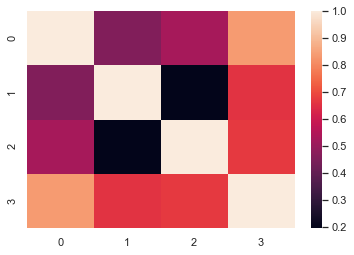

In [186]:
hm = sns.heatmap(corr.values)  # 이 상태로만 출력해보면 아래와 같음. 위 2차원 배열과 같음 형태인 것을 확인

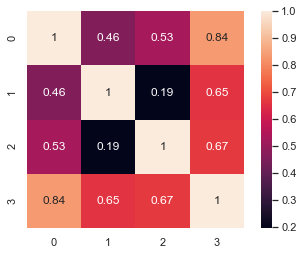

In [187]:
hm = sns.heatmap(corr.values, annot=True, square=True)  # annot: 해당 숫자 표기, square: 정사각형으로 출력

##### ※ annot => annotate(주석을 달다)

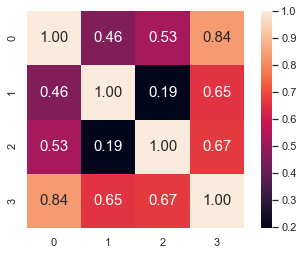

In [188]:
hm = sns.heatmap(corr.values, annot=True, square=True, fmt=".2f", annot_kws={"size":15})  # fmt: 출력 포맷, annot_kws: 숫자 크기

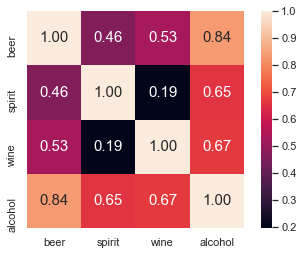

In [189]:
hm = sns.heatmap(corr.values, annot=True, square=True, fmt=".2f", annot_kws={"size":15},
                xticklabels=labels, yticklabels=labels)  # xticklabels: x축 라벨, yticklabels: y축 라벨

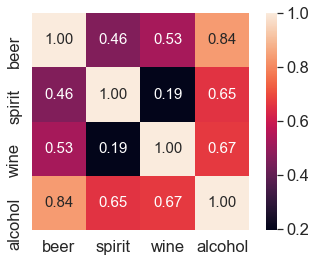

In [190]:
sns.set(font_scale=1.5)  # 폰트스케일 셋팅 가능
hm = sns.heatmap(corr.values, annot=True, square=True, fmt=".2f", annot_kws={"size":15},
                xticklabels=labels, yticklabels=labels)

### pairplot : 데이터프레임 자체를 파라미터로 넣어줌

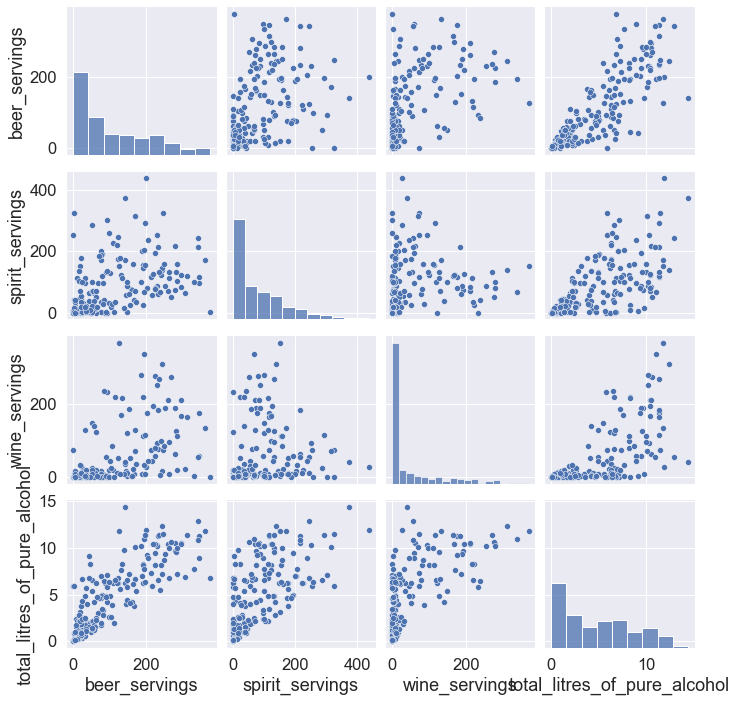

In [191]:
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]])

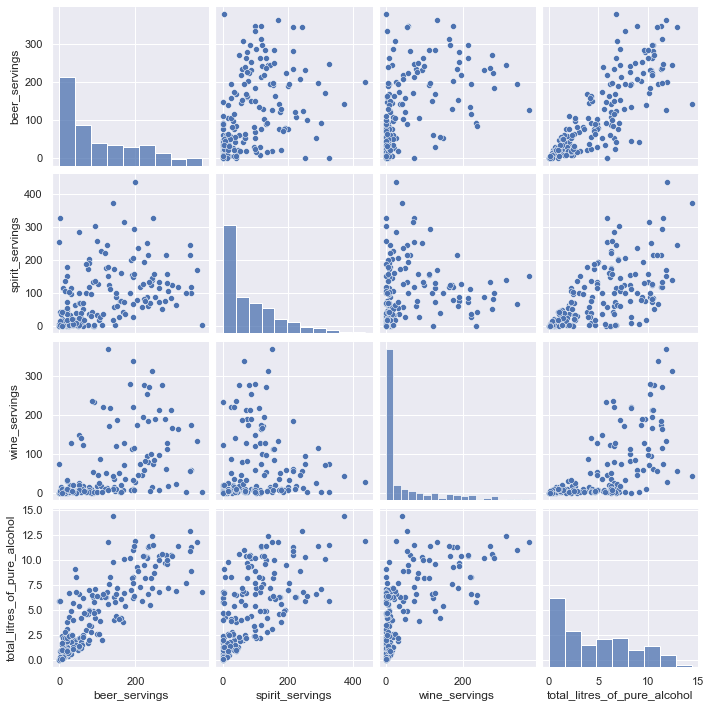

In [192]:
sns.set(context="notebook")  # 기본 셋팅 가능
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]])

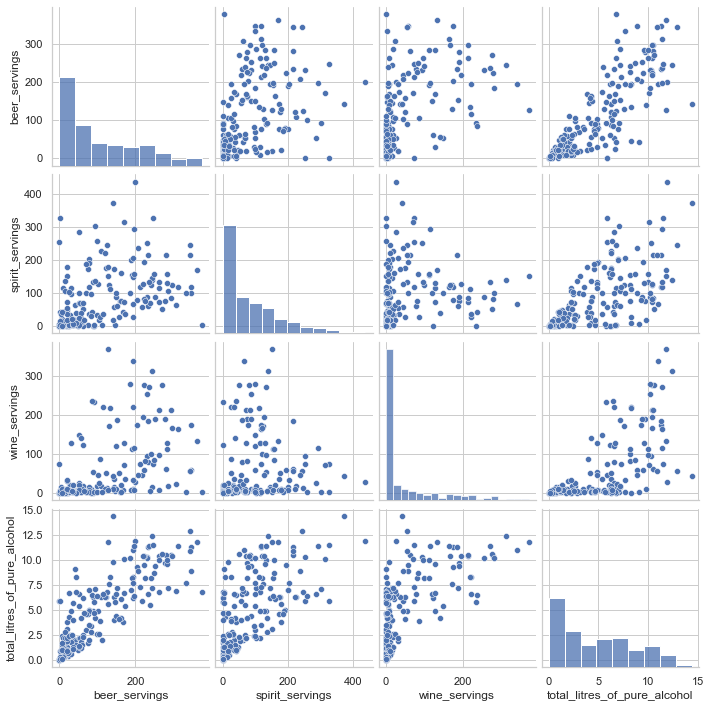

In [193]:
sns.set(style="whitegrid", context="notebook")  # 스타일 등 기본 셋팅 가능
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]])

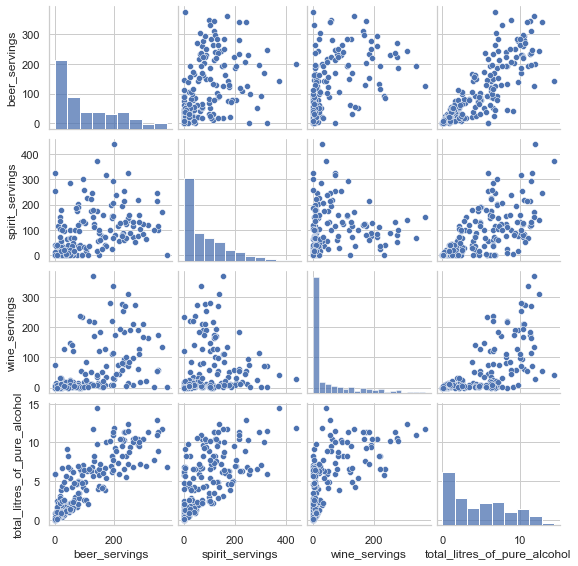

In [194]:
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]],
            height=2.0)  # 옵션을 통한 설정 가능

# 결측 데이터 전처리 : fillna()

In [195]:
drinks.info()
drinks.head(10)  # "continent"열 데이터에 결측 데이터가 있는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [196]:
drinks["continent"] = drinks["continent"].fillna("OT")
drinks.head(10)  # 결측 데이터가 "OT"값으로 채워진 것을 확인

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [197]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


# 파이차트로 시각화해보자

In [198]:
r = drinks["continent"].value_counts()  # 각각의 value별 개수 확인
print(r)

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64


In [199]:
x = r.values.tolist()
x

[53, 45, 44, 23, 16, 12]

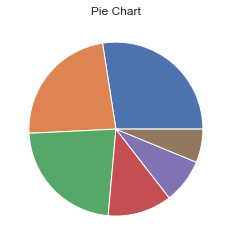

In [200]:
plt.pie(x)  # 우선 값만 넣어주고 출력 결과 확인
plt.title("Pie Chart")
plt.show()

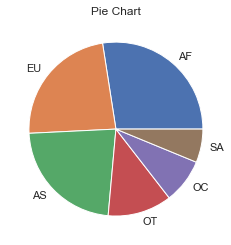

In [201]:
labels = r.index.tolist()  # 위에서 value_counts()로 출력한 결과의 index를 가져옴

plt.pie(x, labels=labels)  # 옵션을 통해 라벨을 넣어줄 수 있음
plt.title("Pie Chart")
plt.show()

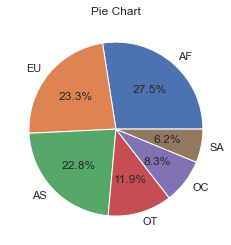

In [202]:
plt.pie(x, labels=labels, autopct="%.1f%%")  # autopct 옵션을 통해 해당 value를 포맷에 맞춰 넣어줄 수 있음
plt.title("Pie Chart")
plt.show()

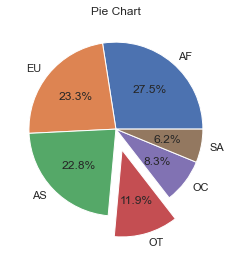

In [203]:
explode = (0, 0, 0, 0.25, 0, 0)  # 4번째 요소에 대해 offset 적용하기 위한 설정

plt.pie(x, labels=labels, autopct="%.1f%%", explode=explode)  # explode 옵션을 통해 아래와 같이 출력 가능
plt.title("Pie Chart")
plt.show()

##### ※ explode 옵션에 적용되는 배열의 길이는 위 x변수의  배열의 길이와 같아야 함

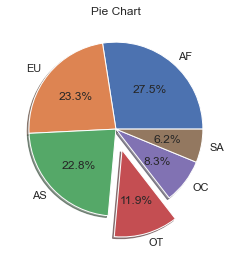

In [204]:
plt.pie(x, labels=labels, autopct="%.1f%%", explode=explode, shadow=True)  # shadow 옵션을 통해 입체적으로 표현 가능
plt.title("Pie Chart")
plt.show()

# agg() 함수 : apply()에 들어가는 함수 파라미터를 병렬로 설정 및 확인 가능

In [205]:
result = drinks.groupby("continent").spirit_servings.agg(["mean", "min", "max", "sum"])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [206]:
count = len(result.index.tolist())
means = result["mean"].tolist()
mins = result["min"].tolist()
maxs = result["max"].tolist()
sums = result["sum"].tolist()

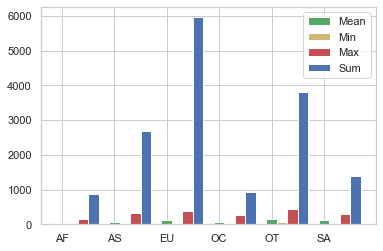

In [208]:
x = result.index.tolist()

index = np.arange(count)
bar_width = 0.2

# Bar 너비 설정 후, 너비에 따른 위치 조정 후 아래와 같이 중첩해서 표현 가능
plt.bar(index, means, bar_width, label="Mean", color='g')
plt.bar(index + bar_width, mins, bar_width, label="Min", color='y')
plt.bar(index + bar_width * 2, maxs, bar_width, label="Max", color='r')
plt.bar(index + bar_width * 3, sums, bar_width, label="Sum", color='b')

plt.xticks(index, x)
plt.legend()
plt.show()

# 전체 평균 대비 대륙별 알콜섭취량 비교

In [209]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()

In [210]:
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()

In [212]:
result = continent_mean[continent_mean > total_mean]
print(result)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [260]:
x = continent_mean.index.tolist()
x.append("Mean")  # 평균치 칸 하나 추가해 줌

continent_mean["Mean"] = total_mean  # 평균치 값을 추가로 넣어줌

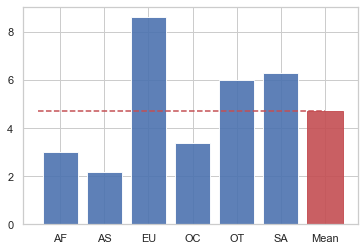

In [264]:
bar = plt.bar(x, continent_mean, align="center", alpha=0.9)
bar[len(x) - 1].set_color('r')  # 마지막 칸에 있는 평균치 값에 대해 별도의 설정 적용
plt.plot([-0.5, 6], [total_mean, total_mean], "r--")  # 평균치 값을 점선으로 표시해 줌

plt.show()

# 시리즈 객체에서 값이 가장 큰 값 찾기 : idxmax() 함수 활용

In [307]:
continent_mean_beer = drinks.groupby("continent").beer_servings.mean()

In [310]:
result = drinks.groupby("continent").beer_servings.mean().idxmax()
print(result)

EU


In [311]:
x = continent_mean_beer.index.tolist()
y = continent_mean_beer.values.tolist()

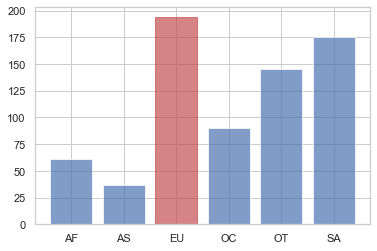

In [312]:
bar = plt.bar(x, y, alpha=0.7)
bar[x.index(result)].set_color("r")  # 위에서 산출한 idxmax() 결과값 result를 적용해 별도 색상 적용

plt.show()